<a href="https://colab.research.google.com/github/MedAziz11/ML_ObjectDetector/blob/main/ObjectDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U "tensorflow>=2.5"
import cv2, time, os, tensorflow as tf
import numpy as np
from tensorflow.python.keras.utils.data_utils import get_file

In [188]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **ObjectDetector :** is a class that allows you to download a Trained model from tensorflow and detect objects from images using that particular model


*  **readClasses:** Method that can read the classes from a particular dataset in my case i used coco Model
*  **downloadModel::** download a specific model from tensorflow and save it into the pretrained_models directory
* **loadModel:** extract the downloaded model and load its data into a variable called model that can take a parameter (image) later to detect the objects in it
* **createBoundingBox:** print a rectangle arround the detected object in the image
* **predictImage:** detect objects in the image and save it into a new image with bounding boxes , object name and precision   


## **How Tenserflow detect objects and the algorithm behind it:**

1.  First, a deep learning model or algorithm is used to generate a large set of bounding boxes spanning the full image (that is, an object localization component) 
2.  Next, visual features are extracted for each of the bounding boxes. They are evaluated and it is determined whether and which objects are present in the boxes based on visual features (i.e. an object classification component)
3. In the final post-processing step, overlapping boxes are combined into a single bounding box (that is, non-maximum suppression) 




In [203]:
class ObjectDetector:
  def __init__(self):
    pass

  def readClasses(self, classesFilePath):
    with open(classesFilePath, 'r') as f:
      self.classesList = f.read().splitlines()

    self.colorList = np.random.uniform(low=0, high=255, size=(len(self.classesList)))


  def downloadModel(self, modelURL):
    fileName = os.path.basename(modelURL)
    self.modelName = fileName[:fileName.index('.')]
     
    self.cacheDir = "./pretrained_models"

    os.makedirs(self.cacheDir, exist_ok=True)

    get_file(fname=fileName, origin=modelURL, cache_dir=self.cacheDir, cache_subdir="checkpoints", extract=True)


  def loadModel(self):
    tf.keras.backend.clear_session()

    self.model = tf.saved_model.load(os.path.join(self.cacheDir, "checkpoints", self.modelName, "saved_model"))
    print("model loaded!!")

  def createBoundingBox(self, image, threshold=0.75):
    in_img = tf.convert_to_tensor(cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB), dtype=tf.uint8)
    in_img = in_img[tf.newaxis, ...]

    detections = self.model(in_img)

    boxs = detections['detection_boxes'][0].numpy()
    classIndexes = detections['detection_classes'][0].numpy().astype(np.int32)
    classScores = detections['detection_scores'][0].numpy()

    boxIdx = tf.image.non_max_suppression(boxs, classScores, max_output_size=200,iou_threshold=threshold, score_threshold=threshold)
    

    imH, imW, imC = image.shape
    if len(boxIdx) != 0:
      for i in boxIdx:
        box = tuple(boxs[i].tolist())
        classPercentage = round(100*classScores[i])
        classIndex = classIndexes[i]

        classLabel = self.classesList[classIndex]
        classColor = self.colorList[classIndex]

        displayText = f"{classLabel}: {classPercentage} %"

        
        ymin, xmin, ymax, xmax = box
        xmin, xmax, ymin, ymax = int(xmin*imW), int(xmax*imW), int(ymin*imH), int(ymax*imH)

        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=classColor, thickness=4)
        cv2.putText(image, displayText, (xmin, ymin-10), cv2.FONT_HERSHEY_PLAIN, 1, classColor, 2)

      
      
      return image




  def predictImage(self, imagePath):
    image = cv2.imread(imagePath)

    res_img = self.createBoundingBox(image)
    cv2.imwrite(f"{self.modelName}.jpg", res_img)


    cv2_imshow(res_img)

    

## **Main Program to run our objects detection class**

In [204]:
od = ObjectDetector()

Trained Models URL 

In [205]:
modelURL = "http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d4_coco17_tpu-32.tar.gz"

Reading the Objects possible names ,downloads the Model, and then load it

In [206]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/MLProject")
objectsFile = "./coco.names"

od.readClasses(objectsFile)
od.downloadModel(modelURL)
od.loadModel()

model loaded!!


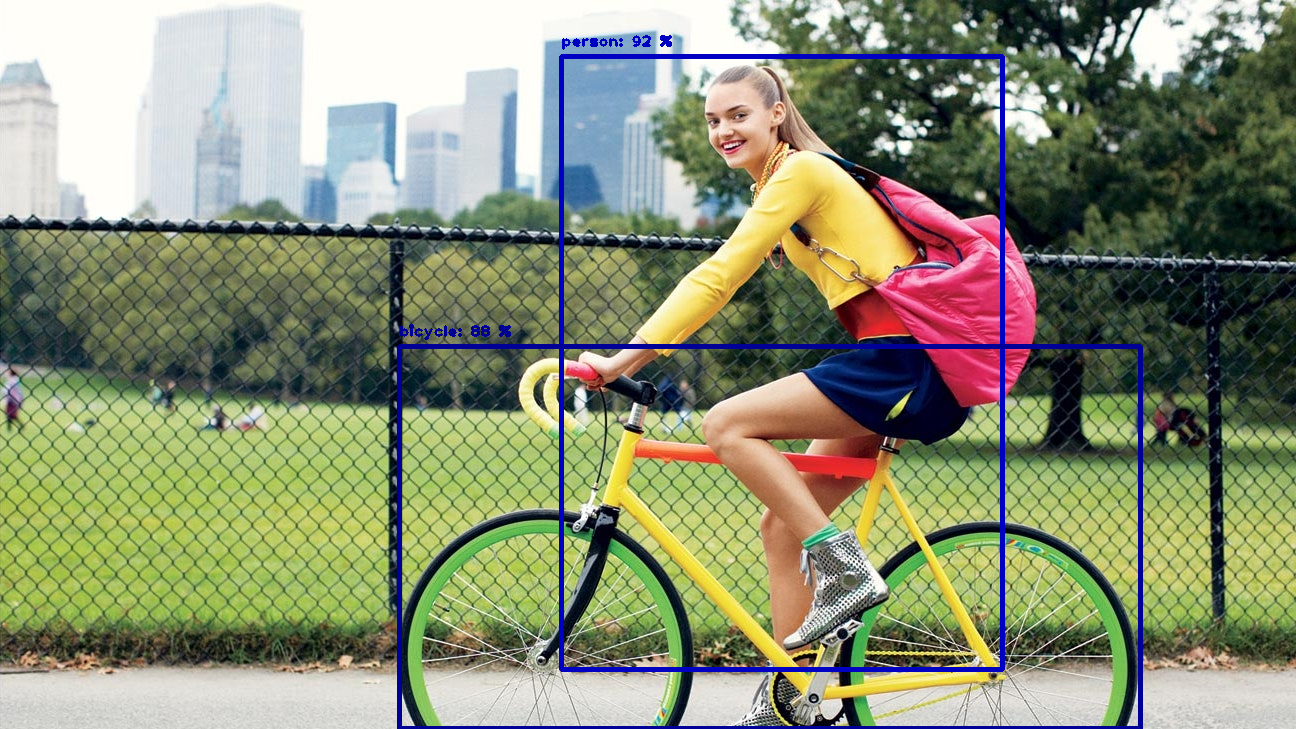

In [207]:
od.predictImage("test/3.jpg")

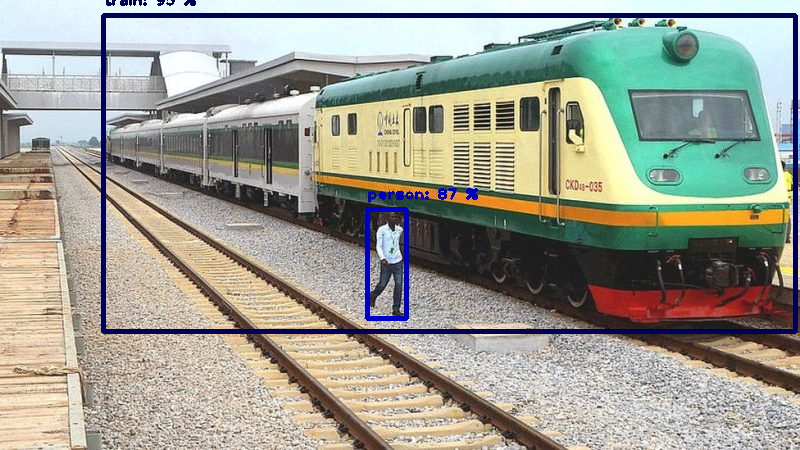

In [208]:
od.predictImage("test/1.jpg")

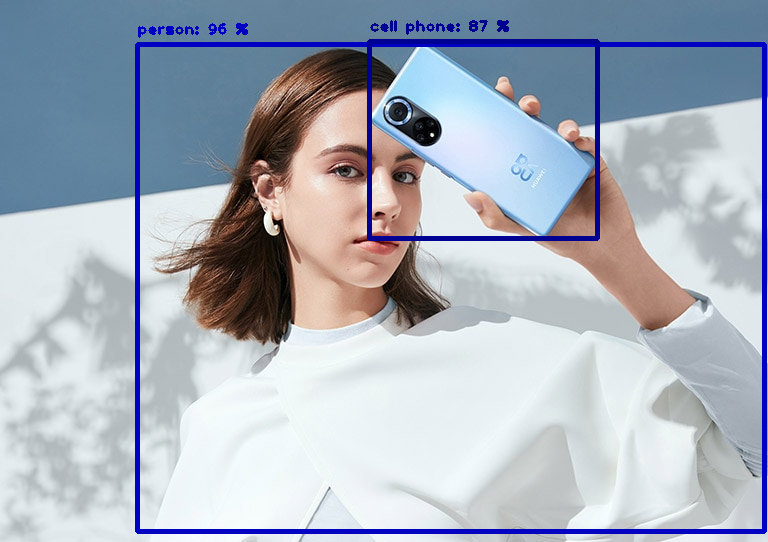

In [209]:
od.predictImage("test/2.jpg")

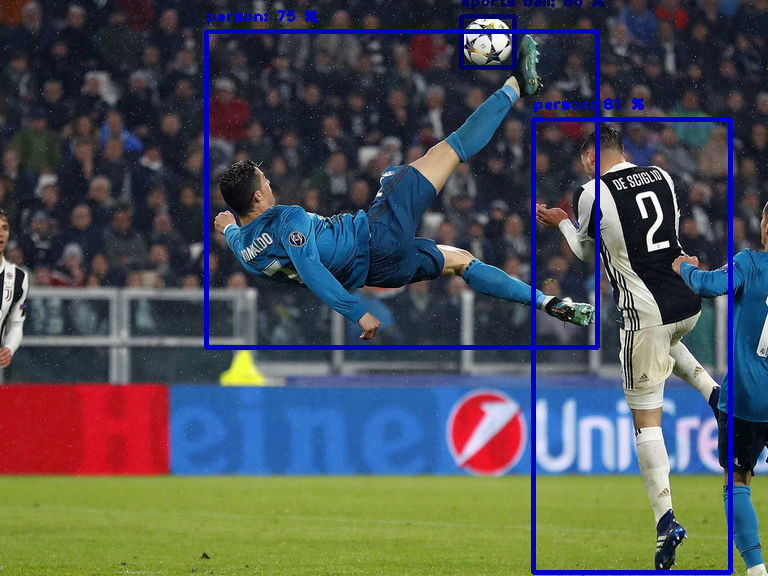

In [210]:
od.predictImage("test/4.jpg")